In [1]:
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

The dataset I used contains various information from Goodreads. Goodreads is a social cataloging website that allows individuals to search its database of books, annotations, quotes, and reviews. Users can sign up and register books to generate library catalogs and reading lists. They can also create their own groups of book suggestions, surveys, polls, blogs, and discussions.

example:  
https://www.goodreads.com/book/show/38357895-convenience-store-woman

The dataset contains a few files with different information:
* *books*: contains metadata for 10,000 different books with information such as author, average rating, year of publication  
* *book_tags*: contains tags assigned by users to books
* *tags*: translates the tag ids from book_tags file to names. Note that tags are user generated so data is very messy.
* *ratings*: contains ratings given by users to books
* *toread*: shows which users marked which book as to read

In [2]:
book_tags=pd.read_csv('book_tags.csv')
books=pd.read_csv('books.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')
to_read=pd.read_csv('to_read.csv')

# BOOKS

In [3]:
#let's look at the book data
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
#look at all the columns
for col in books.columns:
    print(col)

id
book_id
best_book_id
work_id
books_count
isbn
isbn13
authors
original_publication_year
original_title
title
language_code
average_rating
ratings_count
work_ratings_count
work_text_reviews_count
ratings_1
ratings_2
ratings_3
ratings_4
ratings_5
image_url
small_image_url


In [5]:
books.nunique(axis=0)

id                           10000
book_id                      10000
best_book_id                 10000
work_id                      10000
books_count                    597
isbn                          9300
isbn13                        9153
authors                       4664
original_publication_year      293
original_title                9274
title                         9964
language_code                   25
average_rating                 184
ratings_count                 9003
work_ratings_count            9053
work_text_reviews_count       4581
ratings_1                     2630
ratings_2                     4117
ratings_3                     6972
ratings_4                     7762
ratings_5                     8103
image_url                     6669
small_image_url               6669
dtype: int64

There are four different id columns, since all of them are unique I will only keep book_id as this is the column that's also present in the other files.  
I will also drop the isbn, isbn13 and original_title columns.

In [6]:
books=books.drop(['id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'original_title'], axis=1)

In [7]:
100 * books.isnull().sum() / len(books)

book_id                       0.00
books_count                   0.00
authors                       0.00
original_publication_year     0.21
title                         0.00
language_code                10.84
average_rating                0.00
ratings_count                 0.00
work_ratings_count            0.00
work_text_reviews_count       0.00
ratings_1                     0.00
ratings_2                     0.00
ratings_3                     0.00
ratings_4                     0.00
ratings_5                     0.00
image_url                     0.00
small_image_url               0.00
dtype: float64

<Figure size 1440x720 with 0 Axes>

C:\Users\Ula\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_rating', ylabel='Density'>

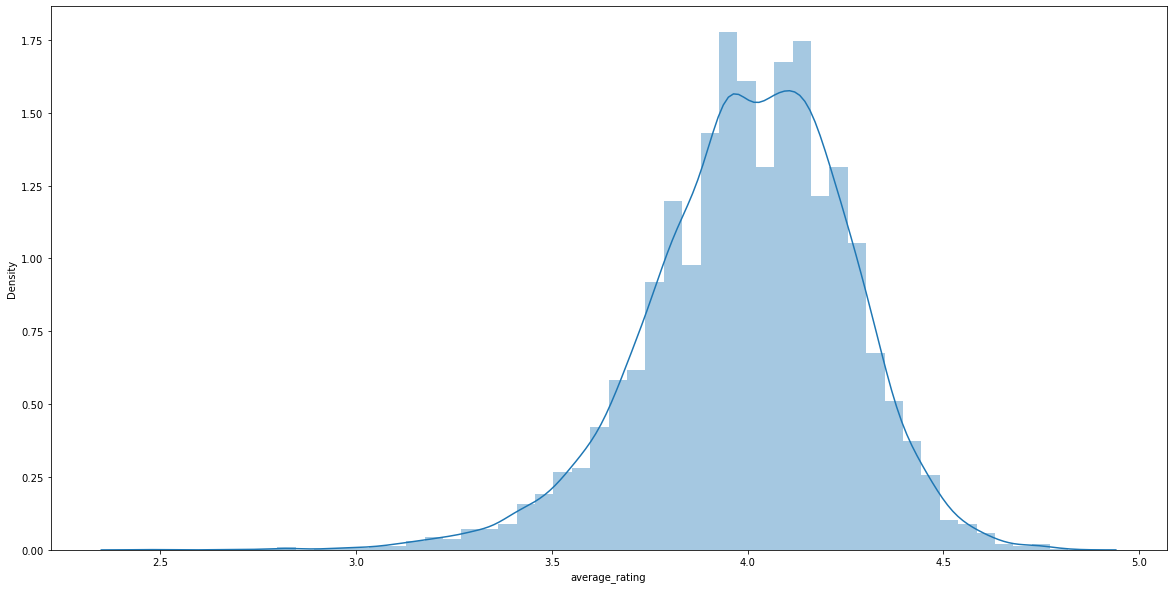

In [8]:
plt.figure(figsize=(20,10))
sns.distplot(a=books['average_rating'])

**BOOKS WITH THE HIGEST AVERAGE RATING**

In [9]:
def path_to_image_html(path):

    return '<img src="'+ path + '""/>'

In [10]:
top_rated_books=books.sort_values('average_rating', ascending=False)
cols=['title','authors', 'small_image_url','average_rating']
top_10=top_rated_books[cols].head(10)
top_10.set_index('title', inplace=True)
HTML(top_10.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,authors,small_image_url,average_rating
title,,,
The Complete Calvin and Hobbes,Bill Watterson,,4.82
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)","J.K. Rowling, Mary GrandPré",,4.77
"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,,4.77
Mark of the Lion Trilogy,Francine Rivers,,4.76
ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",,4.76
It's a Magical World: A Calvin and Hobbes Collection,Bill Watterson,,4.75
There's Treasure Everywhere: A Calvin and Hobbes Collection,Bill Watterson,,4.74
"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,,4.74
"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,,4.73


**BOOKS WITH THE MOST RATINGS**

In [11]:
popular_books=books.sort_values(by='ratings_count', ascending=False)
cols_1=['title','authors', 'small_image_url', 'ratings_count']
pop_10=popular_books[cols_1].head(10)
pop_10.set_index('title', inplace=True)
HTML(pop_10.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,authors,small_image_url,ratings_count
title,,,
"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,,4780653
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","J.K. Rowling, Mary GrandPré",,4602479
"Twilight (Twilight, #1)",Stephenie Meyer,,3866839
To Kill a Mockingbird,Harper Lee,,3198671
The Great Gatsby,F. Scott Fitzgerald,,2683664
The Fault in Our Stars,John Green,,2346404
The Hobbit,J.R.R. Tolkien,,2071616
The Catcher in the Rye,J.D. Salinger,,2044241
Pride and Prejudice,Jane Austen,,2035490


**AUTHORS WITH THE MOST RATINGS**

In [12]:
pop_authors=books.groupby('authors').ratings_count.sum().sort_values(ascending=False)
pop_authors.head(10)

authors
J.K. Rowling, Mary GrandPré    13372767
Suzanne Collins                 8646393
Stephenie Meyer                 8403438
Stephen King                    6505240
J.R.R. Tolkien                  5262785
Rick Riordan                    5126661
Dan Brown                       5002760
Nicholas Sparks                 4270228
Cassandra Clare                 4234130
John Green                      3903939
Name: ratings_count, dtype: int64

Do the authors who have the most ratings also have the most books?

In [13]:
books.groupby('authors').book_id.count().sort_values(ascending=False).head(10)

authors
Stephen King       60
Nora Roberts       59
Dean Koontz        47
Terry Pratchett    42
Agatha Christie    39
Meg Cabot          37
James Patterson    36
David Baldacci     34
John Grisham       33
J.D. Robb          33
Name: book_id, dtype: int64

**AVERAGE RATINGs BY ORIGINAL PUBLICATION YEAR**

In [14]:
publication_year=books.groupby('original_publication_year').count().sort_values(by='original_publication_year')
publication_year['average_rating']=books.groupby('original_publication_year').average_rating.mean()
publication_year

,book_id,books_count,authors,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
original_publication_year,,,,,,,,,,,,,,,,
-1750.0,1,1,1,1,1,3.630000,1,1,1,1,1,1,1,1,1,1
-762.0,1,1,1,1,1,4.030000,1,1,1,1,1,1,1,1,1,1
-750.0,2,2,2,2,2,4.005000,2,2,2,2,2,2,2,2,2,2
-720.0,1,1,1,1,1,3.730000,1,1,1,1,1,1,1,1,1,1
-560.0,1,1,1,1,1,4.050000,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013.0,518,518,518,518,506,4.012297,518,518,518,518,518,518,518,518,518,518
2014.0,437,437,437,437,418,3.985378,437,437,437,437,437,437,437,437,437,437
2015.0,306,306,306,306,280,3.954641,306,306,306,306,306,306,306,306,306,306


<AxesSubplot:xlabel='average_rating', ylabel='original_publication_year'>

Text(0.5, 0, 'original_publication_year')

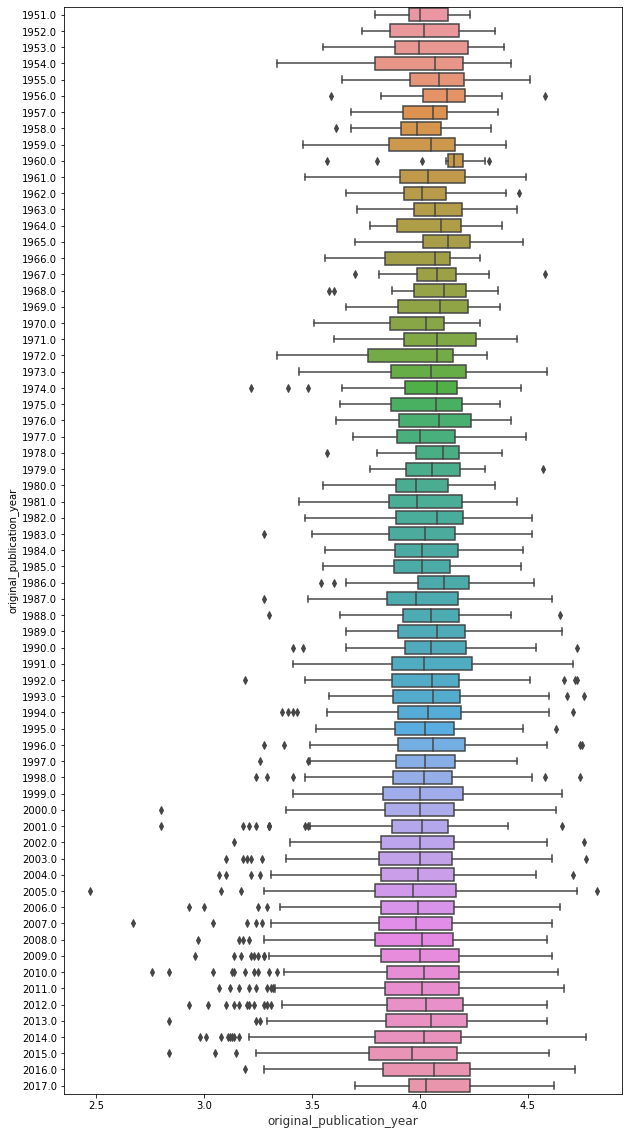

In [15]:
mask=books.loc[books['original_publication_year']>1950]
f, (ax) = plt.subplots(1, 1, figsize=(10, 20))

sns.boxplot(x="average_rating", y="original_publication_year", data=mask,  ax=ax, orient="h")
ax.set_xlabel("original_publication_year",size = 12,alpha=0.8)

Older books have less variation in rating. But the average rating tends to stay the same. This is consistent with the overall rating trend.

In [16]:
#Lets see how the average ratings change per author per year.

grouped_authors_year = books.groupby(['authors', 'original_publication_year']).agg({'average_rating': ['mean']})
grouped_authors_year.columns = ['avg_rating']
grouped_authors_year = grouped_authors_year.reset_index()
grouped_authors_year.head()

,authors,original_publication_year,avg_rating
0,A. Manette Ansay,1994.0,3.360
1,A. Meredith Walters,2012.0,3.945
2,"A.A. Milne, Ernest H. Shepard",1924.0,4.320
3,"A.A. Milne, Ernest H. Shepard",1926.0,4.385
4,"A.A. Milne, Ernest H. Shepard",1927.0,4.380


In [17]:
authors_5_years=[]

for elem in grouped_authors_year.authors:
    if (grouped_authors_year.authors == elem).sum() >4 and elem not in authors_5_years:
        authors_5_years.append(elem)

In [18]:
#Stephen King, Ursula k. Le Guin, William Shakespeare, Suzanne Collins, Ian Fleming
#keep in mind what the average rating is

@interact
def author_through_years(author=authors_5_years):
                 figure(figsize=(20,10))
                 plt.plot(grouped_authors_year.original_publication_year.loc[grouped_authors_year['authors']==author], \
            grouped_authors_year.avg_rating.loc[grouped_authors_year['authors']==author], color='blue', marker='o')

interactive(children=(Dropdown(description='author', options=('A.A. Milne, Ernest H. Shepard', 'Abbi Glines', …

# TAGS

Tags are user generated so the information is very and needs to be cleaned up first. I will do that using the Levenshtein distance. The Levenshtein distance is a metric to measure how apart are two sequences of words. In other words, it measures the minimum number of edits that you need to do to change a one-word sequence into the other.

In [19]:
from Levenshtein import distance
import numpy as np

In [20]:
distance("kid", "kids")

1

In [21]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [22]:
tags.shape

(34252, 2)

In [23]:
threshold_min_length = 5
threshold_max_length = 12
# Replace special characters with empty string
tags["tag_name"] = tags["tag_name"].str.replace(r'[^a-zA-Z ]', "")
# Replace tags smaller than threshold_length with empty string
tags["tag_name"] = tags["tag_name"].apply(lambda x: x if ((len(x) > threshold_min_length) and (len(x) < threshold_max_length)) else "")
# Replace empty strings with NaN
tags["tag_name"] = tags["tag_name"].replace(to_replace="", value=np.nan)
# Remove all nan values
tags = tags.dropna()

In [24]:
tags.shape

(13492, 2)

In [25]:
tags.head()

,tag_id,tag_name
24,24,england
25,25,fiction
26,26,fictional
27,27,fictitious
28,28,football


In [26]:
tags_lst = tags.tag_name.unique().tolist()

In [27]:
thresholdsimilarity = 2

In [28]:
mysimilarities = {}

In [29]:
for tag in tags_lst:
    if tag is None or len(tag)<=1:continue
    for secondtag in tags_lst:
        if secondtag is None or len(secondtag)<=1:continue
        dist = distance(tag, secondtag)
        if dist <= thresholdsimilarity:
            if not tag in mysimilarities.keys():
                mysimilarities[tag] = [secondtag]
            else:
                mysimilarities[tag] += [secondtag]

In [30]:
import pickle

In [31]:
# Save to a pickle
with open('tags_dict.pickle', 'wb') as fout:
    pickle.dump(mysimilarities, fout)

In [32]:
with open('tags_dict.pickle', 'rb') as fout:
    mysimilarities_saved = pickle.load(fout)

In [33]:
final_dict = {}

# Get all tags keys ordered from smaller to bigger
all_keys = sorted(mysimilarities_saved, key=lambda l: len(l), reverse=False)

for tag_key in all_keys:
    try:
        tag_values = mysimilarities_saved[tag_key]
        for curr_tag in tag_values:
            final_tag_values = tag_values.copy()
            try:
                curr_tag_values = mysimilarities_saved[curr_tag]
                final_tag_values += curr_tag_values
                # remove key from dict
                del mysimilarities_saved[curr_tag]
            except:
                continue
        # to remove duplicates from the list use a trick
        # 1st convert to set - does not allow duplicates
        # 2nd convert back to list
        final_dict[tag_key] = list(set(final_tag_values))
    except:
        continue

In [34]:
len(final_dict.keys())

8754

In [35]:
# This is a trick for the computation in all combinations is not heavy for the Pandas Dataframe mapping
flat = [[(k, v) for v in vs] for k, vs in final_dict.items()]
flat_list = [item for sublist in flat for item in sublist]
flat_dict = {}

for pair in flat_list:
    flat_dict[pair[1]] = pair[0]

In [36]:
# To replace given that you gave a dict you only have to do this
tags_replaced = tags.copy()
print(len(tags_replaced.tag_name.unique()))
tags_replaced["tag_name_mapped"] = tags_replaced["tag_name"].map(flat_dict)
print(len(tags_replaced.tag_name.unique()))

12321
12321


In [37]:
tags_replaced.head()

,tag_id,tag_name,tag_name_mapped
24,24,england,england
25,25,fiction,aafiction
26,26,fictional,fictional
27,27,fictitious,fictious
28,28,football,fotball


In [38]:
final_dict["fictional"]

['fictiontr',
 'fictionold',
 'fictionya',
 'fiction',
 'fictions',
 'fictional',
 'fictionwar']

In [39]:
tags_replaced.loc[tags_replaced['tag_name_mapped']=='fictional']

,tag_id,tag_name,tag_name_mapped
26,26,fictional,fictional
11835,11835,fictiontr,fictional
11839,11839,fictionwar,fictional
11844,11844,fictionya,fictional
11847,11847,fictional,fictional


In [40]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [41]:
book_tags=pd.merge(book_tags, tags_replaced[['tag_id', 'tag_name_mapped']], on='tag_id')
book_tags

,goodreads_book_id,tag_id,count,tag_name_mapped
0,1,30574,167697,toread
1,2,30574,24549,toread
2,3,30574,496107,toread
3,5,30574,11909,toread
4,6,30574,298,toread
...,...,...,...,...
529519,31140847,32776,12,rockromance
529520,31538635,14690,6,hogwarts
529521,33288638,27821,9,singlemom
529522,33288638,11478,7,maleauthor


In [42]:
100 * book_tags.isnull().sum() / len(books)

goodreads_book_id    0.0
tag_id               0.0
count                0.0
tag_name_mapped      0.0
dtype: float64

In [43]:
book_tags.rename(columns = {'count':'tags_count'}, inplace = True)

We can look at the popularoty of the tag in two ways:
1. how many times the tag has been used overall
2. how many books is the tag attached to

**MOST COMMON TAGS**

In [45]:
tags_grouped=book_tags.groupby('tag_name_mapped').tags_count.sum().sort_values(ascending=False).reset_index()
tags_count_of_books=book_tags.groupby('tag_name_mapped').goodreads_book_id.count().sort_values(ascending=False).reset_index()
tags_grouped=pd.merge(tags_grouped, tags_count_of_books, on='tag_name_mapped')
tags_grouped.head(10)

,tag_name_mapped,tags_count,goodreads_book_id
0,toread,140725856,10573
1,favorites,4509048,10122
2,aafiction,3691826,9268
3,fantasy,3549621,4361
4,youngadult,1858387,4172
5,bnclassics,1756961,2797
6,booksweown,1318182,10004
7,aaromance,1249977,4803
8,noirfiction,1228982,3973
9,readown,971902,31487


In [46]:
tags_grouped_reversed=tags_grouped.sort_values(by='tags_count', ascending=True)

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 10 artists>

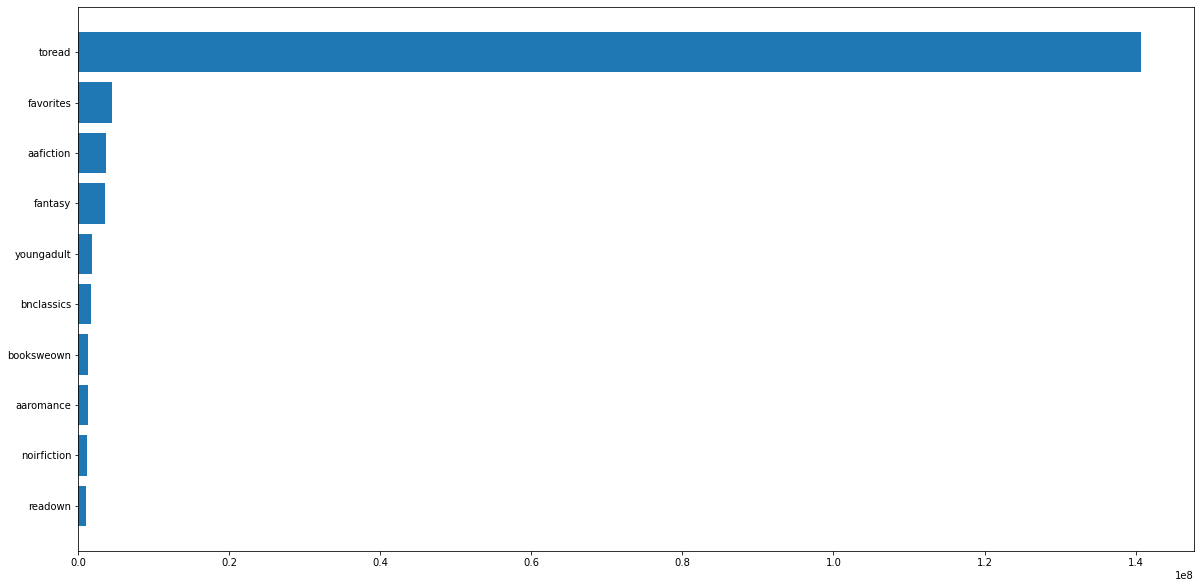

In [47]:
plt.figure(figsize=(20,10))
plt.barh(tags_grouped_reversed['tag_name_mapped'].tail(10),tags_grouped_reversed['tags_count'].tail(10))
plt.show()

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 9 artists>

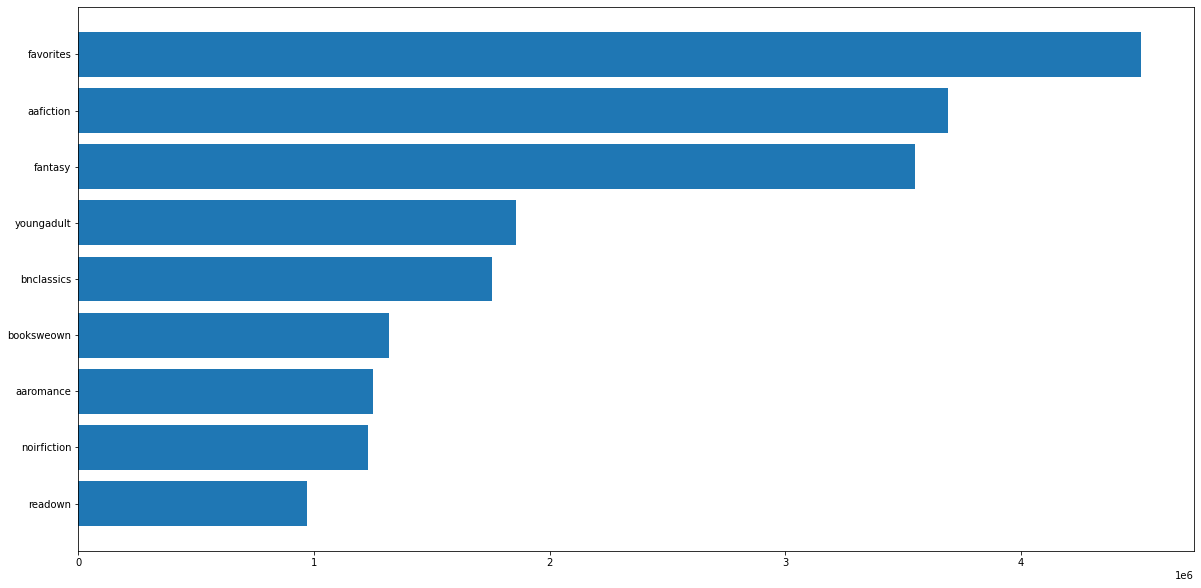

In [48]:
plt.figure(figsize=(20,10))
plt.barh(tags_grouped_reversed['tag_name_mapped'][-10:-1],tags_grouped_reversed['tags_count'][-10:-1])
plt.show()

**HOW MANY BOOKS HAVE THE TAG**

In [50]:
tags_grouped.sort_values(by='goodreads_book_id', ascending=False).head(10)

,tag_name_mapped,tags_count,goodreads_book_id
9,readown,971902,31487
27,newbooks,296555,11844
24,podiobooks,403929,11089
17,audiobook,467740,11030
0,toread,140725856,10573
1,favorites,4509048,10122
6,booksweown,1318182,10004
18,library,429762,9521
21,ownedebooks,417681,9308
30,mtvbooks,286382,9282


**WHICH TAGS DO THE MOST POPULAR BOOKS HAVE**

In [51]:
book_tags.rename(columns = {'goodreads_book_id':'book_id'}, inplace = True)
book_tags=pd.merge(book_tags, books[['book_id', 'title', 'authors', 'original_publication_year', 'average_rating']], on='book_id')
book_tags

,book_id,tag_id,tags_count,tag_name_mapped,title,authors,original_publication_year,average_rating
0,1,30574,167697,toread,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54
3,1,33114,12716,youngadult,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54
4,1,11743,9954,aafiction,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54
...,...,...,...,...,...,...,...,...
529519,675614,8017,5,considering,"Book of Shadows (Sweep, #1)",Cate Tiernan,2001.0,4.04
529520,675614,18922,8,magick,"Book of Shadows (Sweep, #1)",Cate Tiernan,2001.0,4.04
529521,675614,29118,25,sweepseries,"Book of Shadows (Sweep, #1)",Cate Tiernan,2001.0,4.04
529522,675614,33057,7,yawitches,"Book of Shadows (Sweep, #1)",Cate Tiernan,2001.0,4.04


In [52]:
tags_top10_books=pd.merge(book_tags, pop_10, on='title')
tags_top10_books

,book_id,tag_id,tags_count,tag_name_mapped,title,authors_x,original_publication_year,average_rating,authors_y,small_image_url,ratings_count
0,3,30574,496107,toread,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022s...,4602479
1,3,11305,47478,fantasy,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022s...,4602479
2,3,11557,48220,favorites,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022s...,4602479
3,3,33114,14984,youngadult,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022s...,4602479
4,3,11743,13239,aafiction,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022s...,4602479
...,...,...,...,...,...,...,...,...,...,...,...
552,11870085,29402,280,tearjerker,The Fault in Our Stars,John Green,2012.0,4.26,John Green,https://images.gr-assets.com/books/1360206420s...,2346404
553,11870085,10539,271,emotions,The Fault in Our Stars,John Green,2012.0,4.26,John Green,https://images.gr-assets.com/books/1360206420s...,2346404
554,11870085,15281,283,illness,The Fault in Our Stars,John Green,2012.0,4.26,John Green,https://images.gr-assets.com/books/1360206420s...,2346404
555,11870085,16511,1905,johngreen,The Fault in Our Stars,John Green,2012.0,4.26,John Green,https://images.gr-assets.com/books/1360206420s...,2346404


In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<Figure size 1080x1080 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

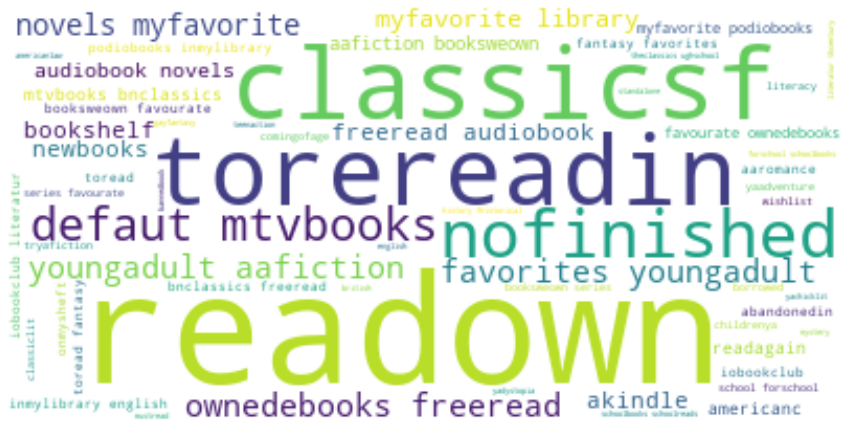

In [54]:
# Start with one review:
text = " ".join(tag for tag in tags_top10_books.tag_name_mapped)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**WHICH TAGS DO THE MOST POPULAR AUTHORS HAVE**

In [55]:
pop_authors=books.groupby('authors').book_id.count().sort_values(ascending=False).head(10).reset_index()

In [56]:
tags_pop_authors=pd.merge(book_tags, pop_authors, on='authors')
tags_pop_authors

,book_id_x,tag_id,tags_count,tag_name_mapped,title,authors,original_publication_year,average_rating,book_id_y
0,1110,30574,3160,toread,The Broker,John Grisham,2005.0,3.77,33
1,1110,11557,78,favorites,The Broker,John Grisham,2005.0,3.77,33
2,1110,11743,191,aafiction,The Broker,John Grisham,2005.0,3.77,33
3,1110,5207,159,booksweown,The Broker,John Grisham,2005.0,3.77,33
4,1110,22753,56,ownedebooks,The Broker,John Grisham,2005.0,3.77,33
...,...,...,...,...,...,...,...,...,...
22505,25337081,15358,66,indeath,"Brotherhood in Death (In Death, #42)",J.D. Robb,2016.0,4.35,33
22506,25337081,10963,16,evedallas,"Brotherhood in Death (In Death, #42)",J.D. Robb,2016.0,4.35,33
22507,25337081,25998,15,robbjd,"Brotherhood in Death (In Death, #42)",J.D. Robb,2016.0,4.35,33
22508,25337081,25997,19,robbjd,"Brotherhood in Death (In Death, #42)",J.D. Robb,2016.0,4.35,33


<Figure size 1080x1080 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

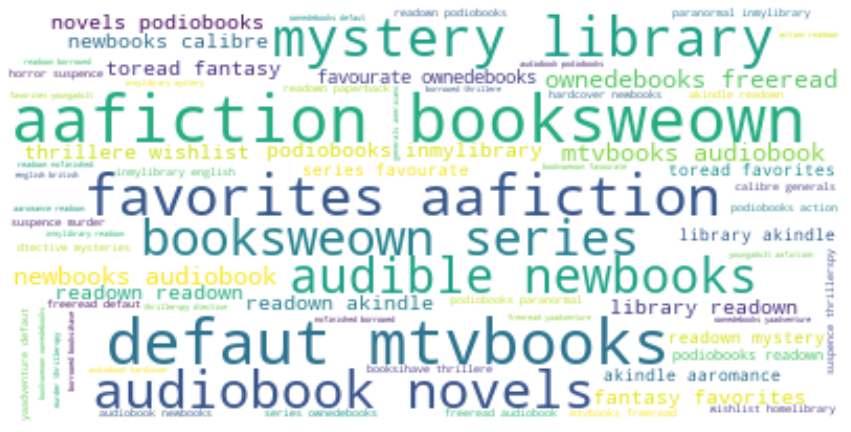

In [57]:
# Start with one review:
text = " ".join(tag for tag in tags_pop_authors.tag_name_mapped)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**TAGS ACROSS THE YEARS**

In [58]:
grouped_tags_year = book_tags.groupby(['tag_name_mapped', 'original_publication_year']).agg({'tags_count': ['sum']})
grouped_tags_year.columns = ['tags_count']
grouped_tags_year = grouped_tags_year.reset_index()
grouped_tags_year.head()

,tag_name_mapped,original_publication_year,tags_count
0,aafiction,-1750.0,662
1,aafiction,-762.0,281
2,aafiction,-750.0,2134
3,aafiction,-720.0,3670
4,aafiction,-560.0,859


In [59]:
@interact
def tags_through_years(Year=list(publication_year.index)):
    display(HTML(f'<h2>Showing most popular tags for books published in {Year} <h2>'))
    
    figure(figsize=(20,10))
    plt.barh(grouped_tags_year.loc[grouped_tags_year['original_publication_year']==Year].\
                     sort_values(by='tags_count')['tag_name_mapped'].tail(10),\
                     grouped_tags_year.loc[grouped_tags_year['original_publication_year']==Year].\
             sort_values(by='tags_count')['tags_count'].tail(10))

interactive(children=(Dropdown(description='Year', options=(-1750.0, -762.0, -750.0, -720.0, -560.0, -500.0, -…

**CHANGE IN TAG'S POPULARITY ACROSS THE YEAR**

In [60]:
top_50_tags=tags_grouped.head(50)

In [61]:
@interact
def tag_counts_through_years(tag_1=list(top_50_tags.tag_name_mapped),\
                             tag_2=list(top_50_tags.tag_name_mapped),\
                             tag_3=list(top_50_tags.tag_name_mapped),\
                            Start_Year=list(publication_year.index),
                            End_Year=list(publication_year.index[1:])):
                 figure(figsize=(20,10))
                 plt.legend([tag_1,tag_2, tag_3])
                 plt.plot(grouped_tags_year.original_publication_year.loc[(grouped_tags_year['tag_name_mapped']==tag_1) & \
                                            (grouped_tags_year['original_publication_year']>=Start_Year) & \
                                            ((grouped_tags_year['original_publication_year']<=End_Year))] ,\
            grouped_tags_year.tags_count.loc[(grouped_tags_year['tag_name_mapped']==tag_1) & \
                                            (grouped_tags_year['original_publication_year']>=Start_Year) & \
                                            ((grouped_tags_year['original_publication_year']<=End_Year))], color='blue')
                 plt.plot(grouped_tags_year.original_publication_year.loc[(grouped_tags_year['tag_name_mapped']==tag_2) & \
                                            (grouped_tags_year['original_publication_year']>=Start_Year) & \
                                            ((grouped_tags_year['original_publication_year']<=End_Year))] ,\
            grouped_tags_year.tags_count.loc[(grouped_tags_year['tag_name_mapped']==tag_2) & \
                                            (grouped_tags_year['original_publication_year']>=Start_Year) & \
                                            ((grouped_tags_year['original_publication_year']<=End_Year))], color='red')
                 plt.plot(grouped_tags_year.original_publication_year.loc[(grouped_tags_year['tag_name_mapped']==tag_3) & \
                                            (grouped_tags_year['original_publication_year']>=Start_Year) & \
                                            ((grouped_tags_year['original_publication_year']<=End_Year))] ,\
            grouped_tags_year.tags_count.loc[(grouped_tags_year['tag_name_mapped']==tag_3) & \
                                            (grouped_tags_year['original_publication_year']>=Start_Year) & \
                                            ((grouped_tags_year['original_publication_year']<=End_Year))], color='green')

interactive(children=(Dropdown(description='tag_1', options=('toread', 'favorites', 'aafiction', 'fantasy', 'y…